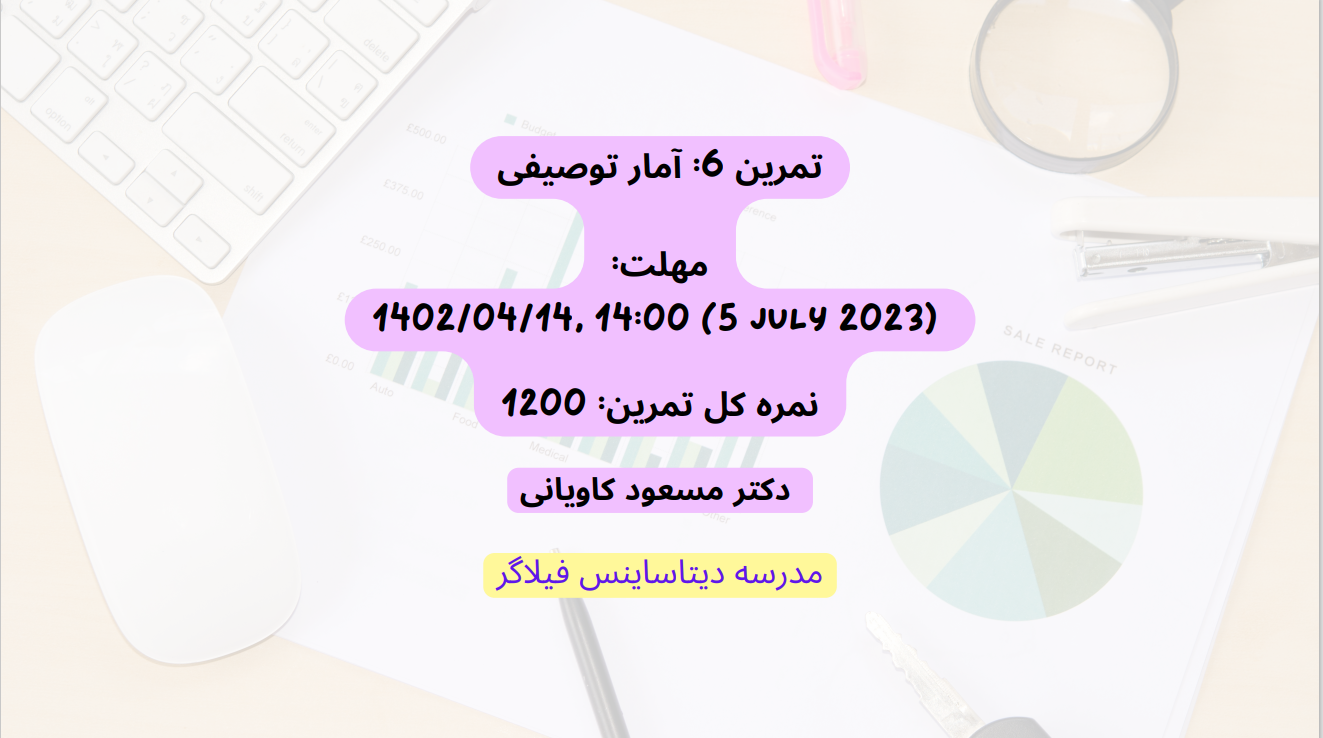
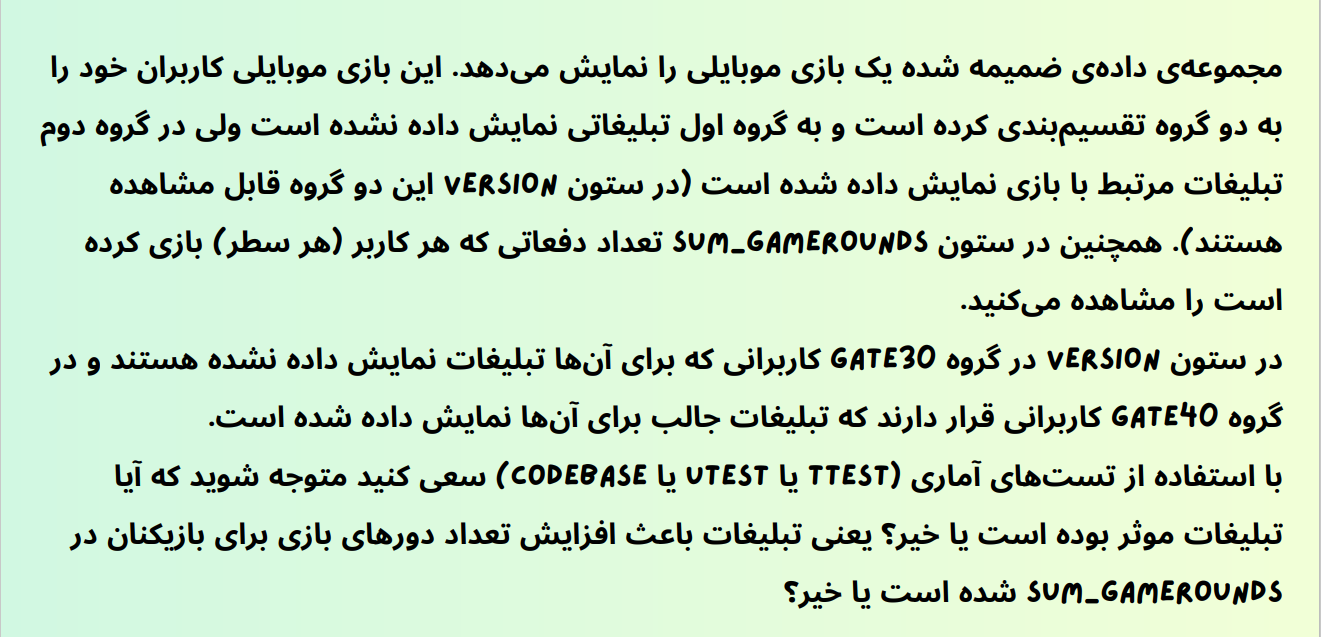

<div style="text-align: center; color: #6F2DA8">
    <h1 style="font-family: 'Calibri', sans-serif; text-align: center; font-size: 50px; margin-top: 0; margin-bottom: 20px; font-weight: bold;">
        Exercise 6 
    </h1> 
</div>

The attached dataset represents a mobile game. The game has divided its users into two groups, where no ads were displayed to the first group, but relevant ads were shown to the second group. This can be observed in the "version" column. Additionally, the "gamerounds_sum" column shows the number of times each user (each row) has played the game.
In the "version" column, users with no ads displayed to them are in the gate_30 group, and users with interesting ads displayed to them are in the gate_40 group.
Using statistical tests (such as T-Test, U-Test, or Codebase), try to determine whether the ads were effective or not. In other words, did the ads increase the number of game rounds played by the players in the "gamerounds_sum" column or not?  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('mibilegame.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
print(f'Number of Rows    : {df.shape[0]}')
print(f'Number of Columns : {df.shape[1]}')
print(f'Features          : {df.columns.tolist()}')
print(f'Missing Values    : {df.isnull().values.sum()}')
print(f'Unique Values     : \n\n{df.nunique()}')

Number of Rows    : 90189
Number of Columns : 5
Features          : ['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7']
Missing Values    : 0
Unique Values     : 

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64


In [4]:
sum(df['userid'].duplicated())  

0

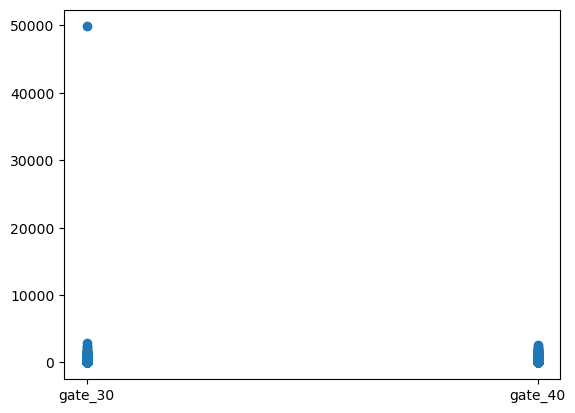

In [5]:
plt.scatter(df['version'],df['sum_gamerounds'])

In [6]:
df[df['sum_gamerounds'] > 10000]       # Noise

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [7]:
df2 = df.drop(57702)                   # Eliminating Noise 

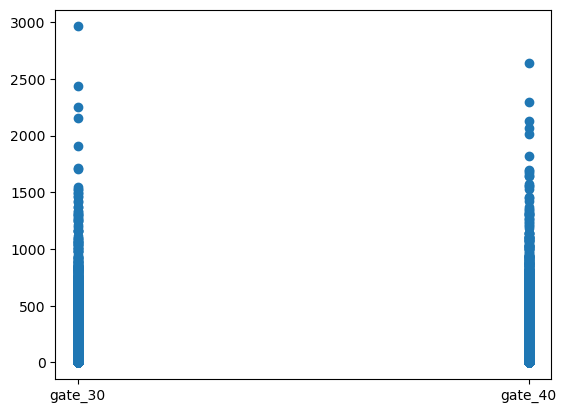

In [8]:
plt.scatter(df2['version'],df2['sum_gamerounds'])

In [9]:
df2['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

In [10]:
gate_30 = df2[df2['version'] == 'gate_30']         # People who didn't watch ads (Control Group)
gate_30['sum_gamerounds'].mean()

51.342110561757536

In [11]:
gate_40 = df2[df2['version'] == 'gate_40']         # People who watched ads (Test Group)
gate_40['sum_gamerounds'].mean()

51.29877552814966

In [12]:
A = gate_30['sum_gamerounds']       # Control Group
B = gate_40['sum_gamerounds']       # Test Group

In [21]:
AB_diff = gate_40['sum_gamerounds'].mean() - gate_30['sum_gamerounds'].mean()
AB_diff * 100

-4.333503360787461

As it is evident, the group who have seen advertisements have played about 4% less compared to the group who have not seen any ads.
Now let's examine the difference between the two groups' trim means :

In [26]:
(stats.trim_mean(gate_40['sum_gamerounds'],0.1) - stats.trim_mean(gate_30['sum_gamerounds'],0.1)) * 100

-3.959073810739966

As observed, the trim mean of the test group is about 4% lower than the control group. Therefore, the advertisements did not have any effect on increasing the game rounds.